Predicting the closing stock price of a Apple Inc. using the past 20 day stock price by an artificial recurrent neural network called LSTM.

In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
# Getting today's date
today = datetime.date.today()

In [4]:
# Get the stock Historical Data
historical_data = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=today)
historical_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2021-07-08,144.059998,140.669998,141.580002,143.240005,105575500.0,143.240005
2021-07-09,145.649994,142.649994,142.750000,145.110001,99788400.0,145.110001
2021-07-12,146.320007,144.000000,146.210007,144.500000,76299700.0,144.500000


In [5]:
historical_data.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [6]:
# Get the number of rows and columns in the data set
historical_data.shape

(2398, 6)

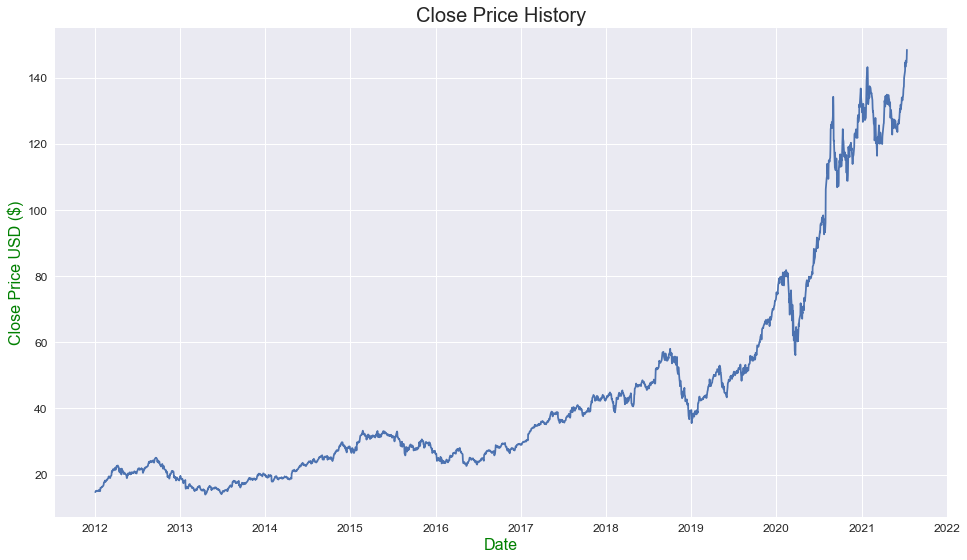

In [7]:
# Visualizing the closing price history
plt.figure(figsize=(16,9))
plt.title('Close Price History', fontsize = 20)
plt.plot(historical_data['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [8]:
# Create a new dataframe with only the 'Close' column
data = historical_data.filter(['Close'])

In [9]:
# Convert the dataframe to a numpy array
dataset = data.values

In [10]:
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset)*.8)
training_data_len

1919

In [11]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0054989 ],
       [0.00608597],
       [0.0073053 ],
       ...,
       [0.9710657 ],
       [0.97954516],
       [1.        ]])

In [12]:
# Create the training data set
train_data = scaled_data[0:training_data_len , :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([0.0054989 , 0.00608597, 0.0073053 , 0.00846618, 0.00828819,
       0.00868932, 0.00850602, 0.00819787, 0.00777815, 0.00907717,
       0.01024867, 0.00988739, 0.00790831, 0.00979707, 0.00793754,
       0.01491078, 0.01437152, 0.01507548, 0.01659764, 0.01751943])]
[0.01744239602798768]



In [13]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1899, 20, 1)

In [15]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# Train the model
model.fit(x_train, y_train, batch_size = 16, epochs = 100, verbose=1)

Epoch 1/100
119/119 [==============================] - 32s 20ms/step - loss: 0.0012
Epoch 2/100
119/119 [==============================] - 2s 19ms/step - loss: 8.8345e-05
Epoch 3/100
119/119 [==============================] - 2s 19ms/step - loss: 7.7292e-05
Epoch 4/100
119/119 [==============================] - 2s 19ms/step - loss: 6.6432e-05
Epoch 5/100
119/119 [==============================] - 2s 19ms/step - loss: 7.0528e-05
Epoch 6/100
119/119 [==============================] - 2s 19ms/step - loss: 6.6450e-05
Epoch 7/100
119/119 [==============================] - 2s 19ms/step - loss: 5.8791e-05
Epoch 8/100
119/119 [==============================] - 2s 19ms/step - loss: 5.3325e-05
Epoch 9/100
119/119 [==============================] - 3s 24ms/step - loss: 4.5662e-05
Epoch 10/100
119/119 [==============================] - 3s 26ms/step - loss: 4.9053e-05
Epoch 11/100
119/119 [==============================] - 3s 25ms/step - loss: 4.2303e-05
Epoch 12/100
119/119 [======================

119/119 [==============================] - 3s 26ms/step - loss: 2.1370e-05
Epoch 94/100
119/119 [==============================] - 3s 25ms/step - loss: 1.6719e-05
Epoch 95/100
119/119 [==============================] - 3s 27ms/step - loss: 1.7143e-05
Epoch 96/100
119/119 [==============================] - 3s 28ms/step - loss: 1.8697e-05: 
Epoch 97/100
119/119 [==============================] - 3s 24ms/step - loss: 1.9404e-05
Epoch 98/100
119/119 [==============================] - 3s 26ms/step - loss: 1.8442e-05
Epoch 99/100
119/119 [==============================] - 3s 28ms/step - loss: 2.1461e-05
Epoch 100/100
119/119 [==============================] - 4s 31ms/step - loss: 1.9101e-05


In [18]:
# Create the testing data set
test_data = scaled_data[training_data_len - past_days: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, 0])

In [19]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [20]:
# Reshape the data
x_test = np.reshape(x_test, (x_test. shape[0], x_test. shape[1], 1))

In [21]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [22]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.293570492611051

C:\Users\Abhi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


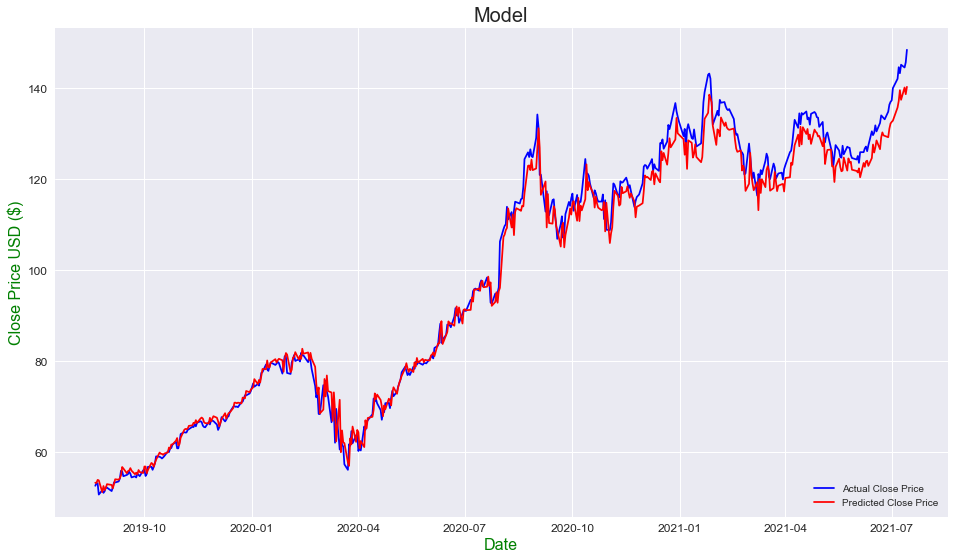

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,9))
plt.title('Model', fontsize = 20)
plt.xlabel('Date', fontsize= 16, color = 'g')
plt.ylabel( 'Close Price USD ($)', fontsize = 16, color = 'g')
plt.plot(valid['Close'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend (loc = 'lower right')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [24]:
# Show the valid and Predicted Prices
valid

,Close,Predictions
Date,,
2019-08-20,52.590000,53.268387
2019-08-21,53.160000,53.204536
2019-08-22,53.115002,53.881176
2019-08-23,50.660000,53.781502
2019-08-26,51.622501,51.200943
...,...,...
2021-07-08,143.240005,139.516037
2021-07-09,145.110001,137.401169
2021-07-12,144.500000,140.103683


### Predicting Close price for next day after the Historical data ends

In [25]:
# Getting next day from where the Historical Dataset ends
last_day = historical_data.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-07-15 00:00:00


In [26]:
# Create a new dataframe
new_df = historical_data.filter(['Close'])
# Get the last 20 day closing price values and convert the dataframe to an array
last_20_days = new_df[-20: ].values
# Scale the data to be values between 0 and 1
last_20_days_scaled = scaler.transform(last_20_days)
# Create an empty list
X_test = []
# Append the past 20 days
X_test.append(last_20_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print('Predicted Closed Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Closed Price for 2021-07-15 00:00:00  =  [[142.72667]]
